## 1. Dataset description<a id='data-desc'></a>

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

**1. Age:** Patients Age in years (Numeric)<br>
**2. Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-        anginal pain, 4 asymptomatic (Nominal)<br>
**4. resting bp s:** Level of blood pressure at resting mode in mm/HG (Numerical)<br>
**5. cholestrol:** Serum cholestrol in mg/dl (Numeric)<br>
**6. fasting blood sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)<br>
**7. resting ecg:** Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)<br>
**8. max heart rate:** Maximum heart rate achieved (Numeric)<br>
**9. exercise angina:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)<br>
**10. oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)<br>

#### Target variable
**12. target:** It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.


## 2. Importing Libraries<a id='imp-lib'></a>

In [82]:

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.metrics import geometric_mean_score
import warnings
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from xgboost import XGBClassifier
from vecstack import stacking
from scipy import stats
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-prediction/heart_disease_prediction.csv


## 3. Loading Dataset<a id='data-load'></a>

In [2]:
dt = pd.read_csv('../input/heart-disease-prediction/heart_disease_prediction.csv')

Lets see some of the sample entries of dataset

In [3]:
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


As we can see from above dataset entries some of the features should be nominal and to be encoded as their category type. In the next step we will be encoding features to their respective category as per the dataset description.

## 4. Data Cleaning & Preprocessing <a id='data-prep'></a>
 In this step we will first change the name of columns as some of the columns have weird naming pattern and then we will encode the features into categorical variables

In [4]:
# renaming features to proper name
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [5]:
# converting features to categorical features 

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'


dt['st_slope'][dt['st_slope'] == 0] = 'normal'
dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [6]:
# checking the top 5 entries of dataset after feature encoding
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


As we can see features are encoded sucessfully to their respective categories. Next we will be checking if there is any missing entry or not ?

In [7]:
## Checking missing entries in the dataset columnwise
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

So, there are no missing entries in the dataset thats great. Next we will move towards exploring the dataset by performing detailed EDA

**EXPLORATORY DATA ANALYSIS (EDA) and INITIAL DATA ANALYSIS (IDA)**

In [8]:
# first checking the shape of the dataset
dt.shape

(1190, 12)

So, there are total 1190 records and 11 features with 1 target variable. Lets check the summary of numerical and categorical features.

In [9]:
# summary statistics of numerical columns
dt.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


As we can see from above description resting_blood_pressure and cholestrol have some outliers as they have minimum value of 0 whereas cholestrol has outlier on upper side also having maximum value of 603.

In [10]:
# summary statistics of categorical columns
dt.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope
count,1190,1190,1190,1190
unique,2,4,3,4
top,male,asymptomatic,normal,flat
freq,909,625,684,582


### Distribution of Heart disease (target variable)

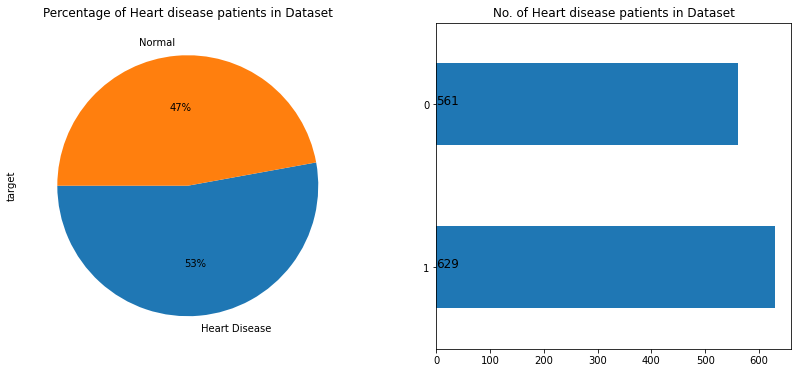

In [11]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dt['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 180,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dt["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dt["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having 629 heart disease patients and 561 normal patients

### Checking Gender & Agewise Distribution

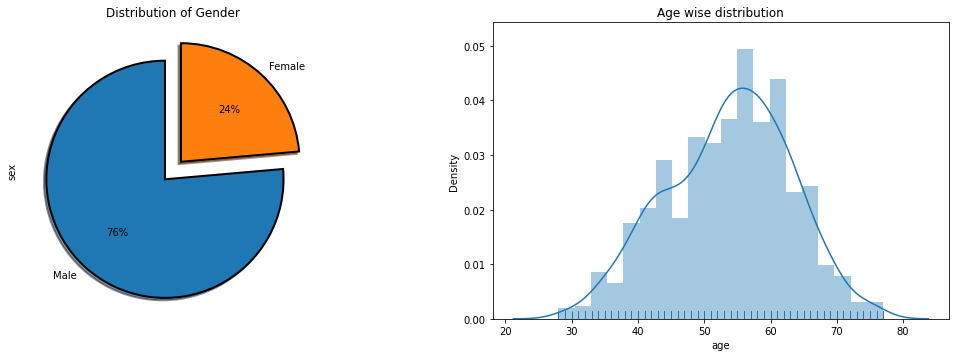

In [12]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette(),startangle = 90,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dt['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females where as average age of patients is around 55.

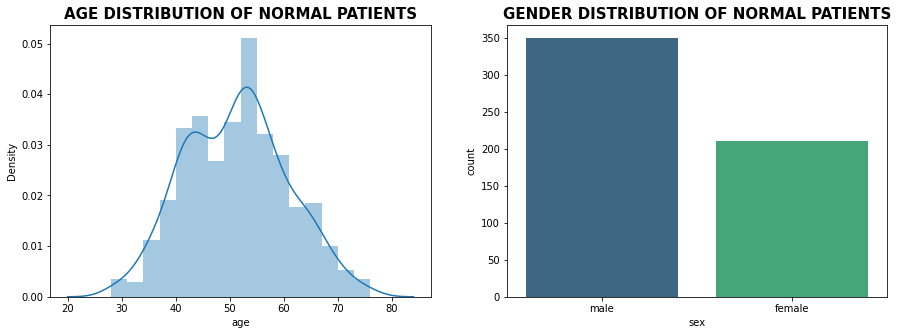

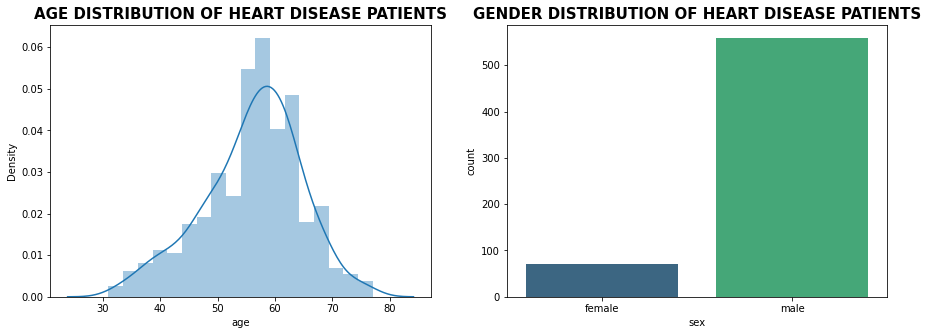

In [13]:
attr_1=dt[dt['target']==1]
attr_0=dt[dt['target']==0]
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

As we can see from above plot more patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 58 to 60 years

### Distribution of Chest Pain Type

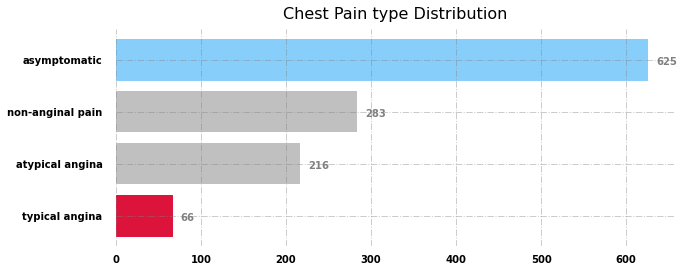

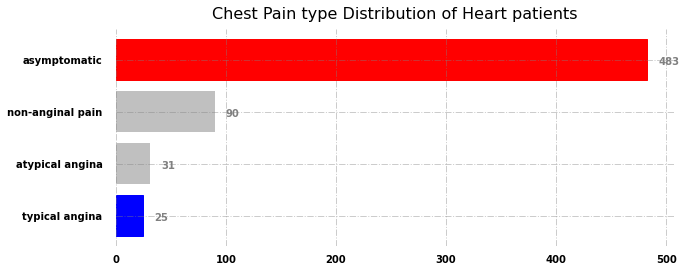

In [14]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[3].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [15]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.790000
atypical angina,32.980000,4.930000
non-anginal pain,34.400000,14.310000
typical angina,7.310000,3.970000


As we can see from above plot **76%** of the chest pain type of the heart disease patients have asymptomatic chest pain. 

Asymptomatic heart attacks medically known as **silent myocardial infarction (SMI)** annually accounts for around 45-50% of morbidities due to cardiac ailments and even premature deaths in India. The incidences among middle aged people experiencing SMI is twice likely to develop in males than females. The symptoms of SMI being very mild in comparison to an actual heart attack; it is described as a silent killer. Unlike the symptoms in a normal heart attack which includes extreme chest pain, stabbing pain in the arms, neck & jaw, sudden shortness of breath, sweating and dizziness, the symptoms of SMI are very brief and hence confused with regular discomfort and most often ignored.

[reference](https://www.maxhealthcare.in/blogs/cardiology/rise-cases-asymptomatic-heart-attacks-amongst-middle-aged-people)

### Distribution of Rest ECG

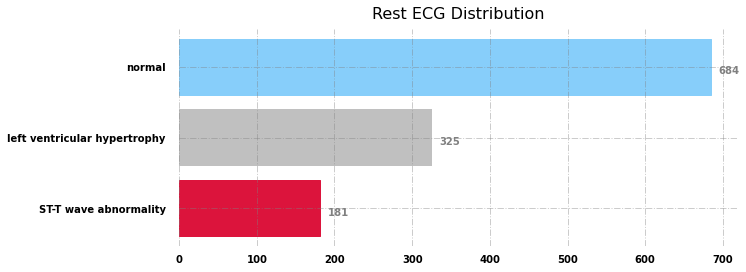

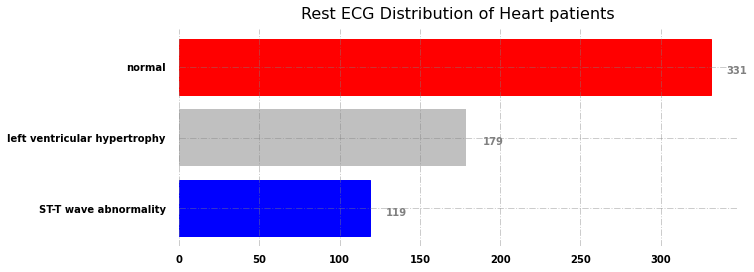

In [16]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.rest_ecg.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[2].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.rest_ecg.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[2].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [17]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.920000
left ventricular hypertrophy,26.020000,28.460000
normal,62.920000,52.620000


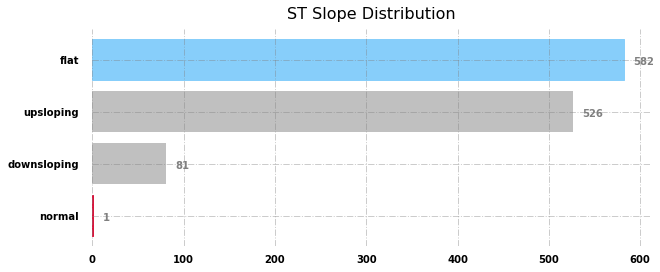

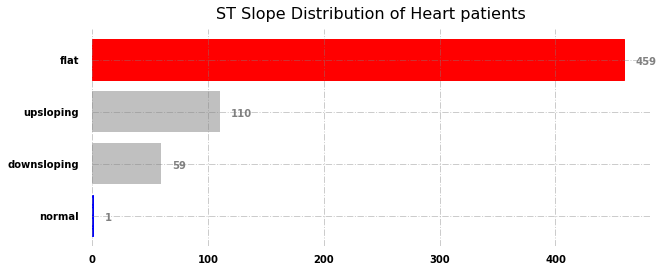

In [18]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dt.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[3].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [19]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]], dt[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.380000
flat,21.930000,72.970000
normal,0.000000,0.160000
upsloping,74.150000,17.490000


### Distribution of Numerical features

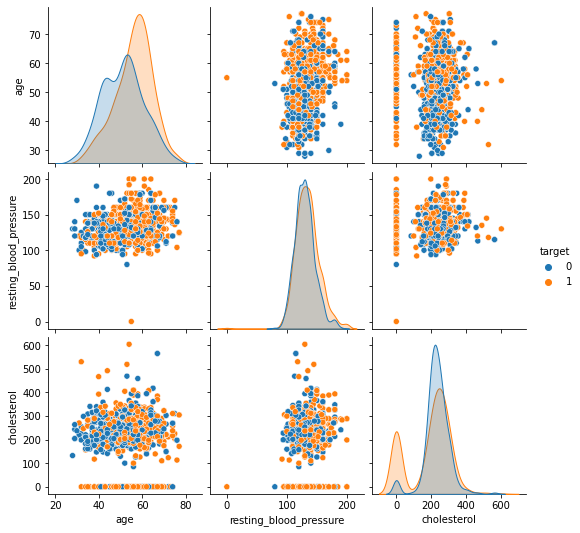

In [20]:
sns.pairplot(dt, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

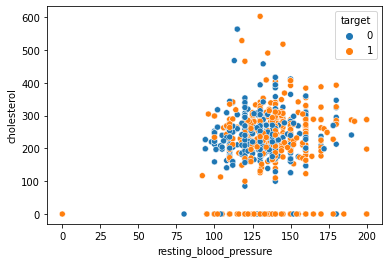

In [21]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dt)

From the above plot we can see outliers clearly as for some of the patients cholestrol is 0 whereas for one patient both cholestrol and resting bp is 0 which is may be due to missing entries we will filter these ouliers later

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

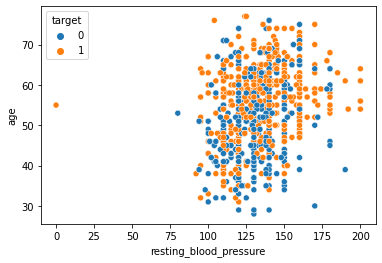

In [22]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dt)

## 5. Outlier Detection & Removal <a id='data-out'></a>

Outliers are data point which are too different from rest of the data

In [23]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

dt_numeric = dt[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [24]:
dt_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [25]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dt_numeric))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466728                0.427328     0.775674                 1.265039
1     0.504600                1.516587     0.299512                 0.637758
2     1.787437                0.117301     0.716489                 1.636136
3     0.611503                0.318402     0.035867                 1.244085
4     0.029915                0.971958     0.151550                 0.695214
...        ...                     ...          ...                      ...
1185  0.932213                1.206560     0.529071                 0.303164
1186  1.526558                0.645180     0.171279                 0.049682
1187  0.350624                0.117301     0.782852                 0.969650
1188  0.350624                0.117301     0.252877                 1.343449
1189  1.680534                0.318402     0.348832                 1.304244

[1190 rows x 4 columns]


from these points it is diffciult to say which points are outliers so we will now define threshold

In [26]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  593,
        618,  734,  761, 1013, 1039, 1075]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[30][2] have a Z-score higher than 3. There are total 17 data points which are outliers.

In [27]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [28]:
# checking shape of dataset after outlier removal
dt.shape

(1173, 12)

Great !! all the 17 data points which are outliers are now removed.

Now before splitting dataset into train and test we first encode categorical variables as dummy variables and segregate feature and target variable.

In [29]:
## encoding categorical variables
dt = pd.get_dummies(dt, drop_first=True)

dt.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,1,1,0,0,0,1,0,0,1
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,1,1,0,0
2,37,130,283,0,98,0,0.0,0,1,1,0,0,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,0,1,1,0,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,0,1


In [30]:
# checking the shape of dataset
dt.shape

(1173, 17)

In [31]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target'],axis=1)
y = dt['target']

## 6. Train Test Split <a id='data-train'></a>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [33]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(938, 16)
(938,)
------------Test Set------------------
(235, 16)
(235,)


### feature normalization
In this step we will normalize all the numeric feature in the range of 0 to 1

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1167,0.591837,0.193548,0.682281,0,0.562963,1,0.584416,1,0,0,0,0,1,1,0,0
787,0.836735,0.731183,0.476578,1,0.474074,0,0.207792,1,0,0,1,1,0,1,0,0
208,0.142857,0.193548,0.523422,0,0.540741,0,0.194805,1,1,0,0,0,1,1,0,0
617,0.857143,0.408602,0.655804,0,0.311111,0,0.506494,1,0,0,0,1,0,1,0,0
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,0,1


In [35]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1098,0.204082,0.301075,0.470468,0,0.851852,1,0.688312,1,0,0,1,0,1,1,0,0
835,0.530612,0.301075,0.525458,0,0.592593,0,0.246753,1,0,1,0,1,0,1,0,0
670,0.714286,0.516129,0.397149,0,0.829630,0,0.194805,0,1,0,0,0,1,0,0,1
502,0.714286,0.408602,0.627291,0,0.525926,1,0.454545,1,0,0,0,0,1,1,0,0
498,0.673469,0.580645,0.490835,0,0.600000,1,0.584416,1,0,0,0,0,1,0,0,0


In [49]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000)))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500)))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100)))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

## 7. Model building <a id='data-model'></a>

### Random Forest Classifier (criterion = 'entropy')

In [50]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

### Multi Layer Perceptron

In [51]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

### K nearest neighbour (n=9)

In [52]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Extra Tree Classifier (n_estimators=500)

In [53]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)

### XGBoost (n_estimators=100)

In [54]:
xgb = xgb.XGBClassifier(n_estimators= 100)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

### Support Vector Classifier (kernel='linear')

In [55]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

### Stochastic Gradient Descent

In [56]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

### Adaboost Classifier

In [57]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

### decision Tree Classifier (CART)

In [58]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

### gradient boosting machine 

In [59]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

**SELECTING MODEL TO EVALUATE**
We will evaluate the model with highest accuracy

In [61]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    MLPClassifier(),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(9),
    ExtraTreesClassifier(n_estimators= 500),
    ExtraTreesClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 1000),
    xgboost.XGBClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 500),
    xgboost.XGBClassifier(n_estimators= 2000),
    xgboost.XGBClassifier(),
    SGDClassifier(max_iter=1000, tol=1e-4),
    
    SVC(kernel='linear',gamma='auto',probability=True),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]


We will use "Stacked Ensemble" to calculate accuracy of the models

In [62]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [18]

model  0:     [RandomForestClassifier]
    fold  0:  [0.91489362]
    fold  1:  [0.94680851]
    fold  2:  [0.89361702]
    fold  3:  [0.95187166]
    fold  4:  [0.90909091]
    ----
    MEAN:     [0.92325634] + [0.02246163]
    FULL:     [0.92324094]

model  1:     [MLPClassifier]
    fold  0:  [0.89893617]
    fold  1:  [0.89361702]
    fold  2:  [0.81914894]
    fold  3:  [0.89839572]
    fold  4:  [0.83957219]
    ----
    MEAN:     [0.86993401] + [0.03380249]
    FULL:     [0.86993603]

model  2:     [RandomForestClassifier]
    fold  0:  [0.88297872]
    fold  1:  [0.94680851]
    fold  2:  [0.92553191]
    fold  3:  [0.93582888]
    fold  4:  [0.89304813]
    ----
    MEAN:     [0.91683923] + [0.02468553]
    FULL:     [0.91684435]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.88829787]
    fold  1:  [0.90425532]
    fold  2:  [0.79255319]
   

In [64]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.88936170]


## 8. Model Evaluation  <a id='model-eval'></a>

 In this step we will first define which evaluation metrics we will use to evaluate our model. The most important evaluation metric for this problem domain is **sensitivity, specificity, Precision, F1-measure, Geometric mean and mathew correlation coefficient and finally ROC AUC curve**
 
### Sensitivity vs Specificity

![](https://i.ibb.co/d43FVfJ/Sensitivity-and-specificity-svg.png)

### Mathew Correlation coefficient (MCC)

The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.

![](https://i.ibb.co/mH6MmG4/mcc.jpg)

### Log Loss
Logarithmic loss  measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high log loss.

The graph below shows the range of possible log loss values given a true observation (isDog = 1). As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predications that are confident and wrong!

![](https://i.ibb.co/6BdDczW/log-loss.jpg)

### F1 Score

 F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

**F1 Score = 2*(Recall * Precision) / (Recall + Precision)**

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.889362,0.864662,0.934959,0.839286,0.898438,0.887123,3.821373,0.780215


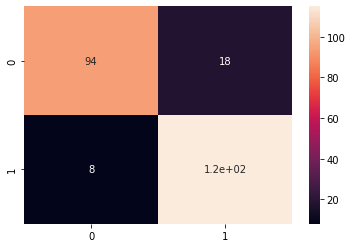

In [65]:
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

mathew = matthews_corrcoef(y_test, y_pred)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

## Comparison with other Models

In [66]:
data = {'Random Forest': y_pred_rfe, 
                'MLP': y_pred_mlp, 
                'KNN': y_pred_knn, 
                'EXtra tree classifier': y_pred_et500,
                'XGB': y_pred_xgb, 
                'SVC': y_pred_svc, 
                'SGD': y_pred_sgd,
                'Adaboost': y_pred_ada, 
                'CART': y_pred_decc, 
                'GBM': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.889362,0.864662,0.934959,0.839286,0.898438,0.887123,3.821373,0.780215
1,Random Forest,0.893617,0.871212,0.934959,0.848214,0.901961,0.891587,3.674396,0.788341
2,MLP,0.808511,0.782609,0.878049,0.732143,0.827586,0.805096,6.613910,0.619017
3,KNN,0.800000,0.787879,0.845528,0.750000,0.815686,0.797764,6.907851,0.599458
4,EXtra tree classifier,0.885106,0.869231,0.918699,0.848214,0.893281,0.883457,3.968343,0.770445
5,XGB,0.880851,0.886179,0.886179,0.875000,0.886179,0.880589,4.115306,0.761179
6,SVC,0.812766,0.788321,0.878049,0.741071,0.830769,0.809560,6.466933,0.627138
7,SGD,0.757447,0.789474,0.731707,0.785714,0.759494,0.758711,8.377572,0.517084
8,Adaboost,0.817021,0.812500,0.845528,0.785714,0.828685,0.815621,6.319943,0.633084
9,CART,0.851064,0.872881,0.837398,0.866071,0.854772,0.851735,5.144124,0.702705


### Findings
- AS we can see from above results, Stacked Ensemble Classifier is best performer as it has highest test accuracy of 0.906, sensitivity of 0.943 and specificity of 0.866 and highest f1-score of 0.9133 and lowest Log Loss of 3.23 and highest ROC value of 0.904
- Random Forest & Extra Tree classifier are second best having same performance measure in every aspect
- XGboost has third best sensitivity level

### ROC AUC Curve

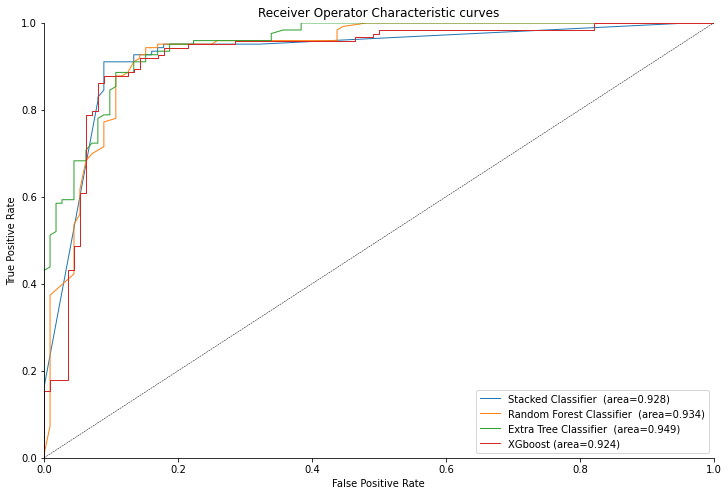

In [67]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,model.predict_proba(S_test),label='Stacked Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

As we can see highest average area under the curve (AUC) of 0.950 is attained by Extra Tree Classifier

As we have seen Randomforest is second best performing model in every performance measure. So we will be plotting SHAP feature importance plot using random forest to know which features are actually contributing in model's prediction.

In [68]:
num_feats=11

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

11 selected features


In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

11 selected features


In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 16 features.
11 selected features


In [71]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

7 selected features


In [72]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='entropy'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

8 selected features


In [73]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

7 selected features


In [74]:
# put all selection together
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,st_depression,True,True,True,True,True,True,6
2,st_slope_upsloping,True,True,True,False,True,True,5
3,st_slope_flat,True,True,True,True,True,False,5
4,max_heart_rate_achieved,True,True,True,False,True,True,5
5,exercise_induced_angina,True,True,True,False,True,True,5
6,cholesterol,True,False,True,True,True,True,5
7,age,True,True,True,False,True,True,5
8,sex_male,True,True,True,True,False,False,4
9,chest_pain_type_non-anginal pain,True,True,True,True,False,False,4
10,chest_pain_type_atypical angina,True,True,True,True,False,False,4


In [75]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['target','resting_blood_pressure'],axis=1)
y = dt['target']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1167,0.591837,0.682281,0,0.562963,1,0.584416,1,0,0,0,0,1,1,0,0
787,0.836735,0.476578,1,0.474074,0,0.207792,1,0,0,1,1,0,1,0,0
208,0.142857,0.523422,0,0.540741,0,0.194805,1,1,0,0,0,1,1,0,0
617,0.857143,0.655804,0,0.311111,0,0.506494,1,0,0,0,1,0,1,0,0
253,0.673469,0.594705,0,0.355556,1,0.194805,1,0,0,0,0,0,0,0,1


In [78]:
X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_normal,st_slope_upsloping
1098,0.204082,0.470468,0,0.851852,1,0.688312,1,0,0,1,0,1,1,0,0
835,0.530612,0.525458,0,0.592593,0,0.246753,1,0,1,0,1,0,1,0,0
670,0.714286,0.397149,0,0.829630,0,0.194805,0,1,0,0,0,1,0,0,1
502,0.714286,0.627291,0,0.525926,1,0.454545,1,0,0,0,0,1,1,0,0
498,0.673469,0.490835,0,0.600000,1,0.584416,1,0,0,0,0,1,0,0,0


## 9. SOFT VOTING

In [85]:
import xgboost as xgb
clf1=RandomForestClassifier(criterion='entropy',n_estimators=100)

clf2=DecisionTreeClassifier()
clf3=xgb.XGBClassifier(n_estimators= 1000)
clf4=ExtraTreesClassifier(n_estimators= 500)

clf5=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


eclf1 = VotingClassifier(estimators=[('rfe', clf1), ('decc', clf2), ('xgb', clf3),('ET',clf4),('gb',clf5),], 
                         voting='soft', weights=[4,1,2,3,1])
eclf1.fit(X_train,y_train)
y_pred_sv =eclf1.predict(X_test)

**MODEL EVALUATION**

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.893617,0.876923,0.926829,0.857143,0.901186,0.891986,3.674392,0.787582


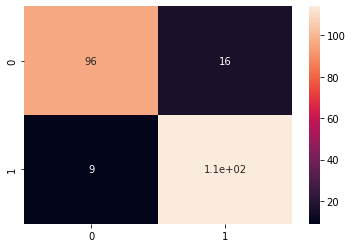

In [86]:
CM=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

mathew = matthews_corrcoef(y_test, y_pred_sv)
model_results =pd.DataFrame([['Soft Voting',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [87]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [88]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [89]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [90]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)

In [91]:
xgb = xgb.XGBClassifier(n_estimators= 100)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [92]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [93]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

In [94]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [95]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [96]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [97]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    MLPClassifier(),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(9),
    ExtraTreesClassifier(n_estimators= 500),
    ExtraTreesClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 1000),
    xgboost.XGBClassifier(n_estimators= 100),
    xgboost.XGBClassifier(n_estimators= 500),
    xgboost.XGBClassifier(n_estimators= 2000),
    xgboost.XGBClassifier(),
    SGDClassifier(max_iter=1000, tol=1e-4),
    
    SVC(kernel='linear',gamma='auto',probability=True),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]

In [98]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.88510638]


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier2,0.885106,0.863636,0.926829,0.839286,0.894118,0.883057,3.968346,0.77117


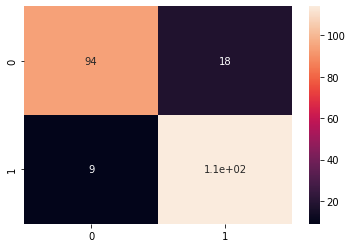

In [99]:
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

mathew = matthews_corrcoef(y_test, y_pred)
model_results =pd.DataFrame([['STacked Classifier2',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [100]:
data = {'Random Forest2': y_pred_rfe, 
                'MLP2': y_pred_mlp, 
                'KNN2': y_pred_knn, 
                'EXtra tree classifier2': y_pred_et500,
                'XGB2': y_pred_xgb, 
                'SVC2': y_pred_svc, 
                'SGD2': y_pred_sgd,
                'Adaboost2': y_pred_ada, 
                'CART2': y_pred_decc, 
                'GBM2': y_pred_gbm }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier2,0.885106,0.863636,0.926829,0.839286,0.894118,0.883057,3.968346,0.771170
1,Random Forest2,0.893617,0.871212,0.934959,0.848214,0.901961,0.891587,3.674396,0.788341
2,MLP2,0.817021,0.789855,0.886179,0.741071,0.835249,0.813625,6.319960,0.636322
3,KNN2,0.791489,0.776119,0.845528,0.732143,0.809339,0.788836,7.201804,0.582813
4,EXtra tree classifier2,0.893617,0.882812,0.918699,0.866071,0.900398,0.892385,3.674389,0.787059
5,XGB2,0.876596,0.861538,0.910569,0.839286,0.885375,0.874927,4.262293,0.753308
6,SVC2,0.817021,0.794118,0.878049,0.750000,0.833977,0.814024,6.319956,0.635284
7,SGD2,0.804255,0.803150,0.829268,0.776786,0.816000,0.803027,6.760867,0.607378
8,Adaboost2,0.825532,0.810606,0.869919,0.776786,0.839216,0.823352,6.025999,0.650971
9,CART2,0.863830,0.902655,0.829268,0.901786,0.864407,0.865527,4.703190,0.730789


**ROC AUC PLOT**

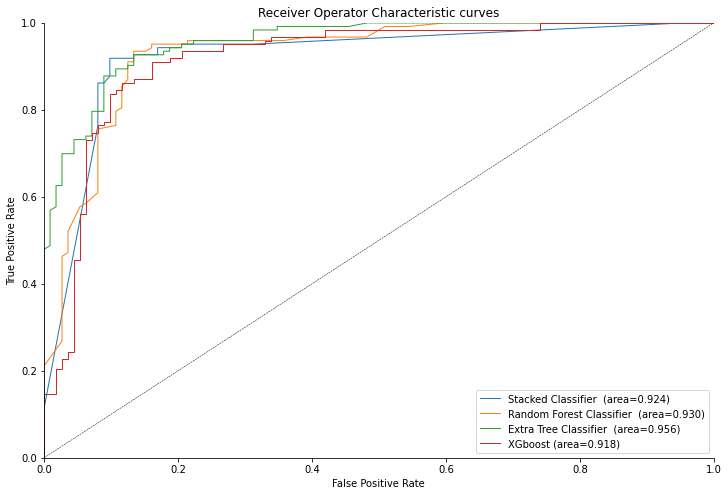

In [101]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,model.predict_proba(S_test),label='Stacked Classifier ',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
roc_auc_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

**PRECISION RECALL CURVES**

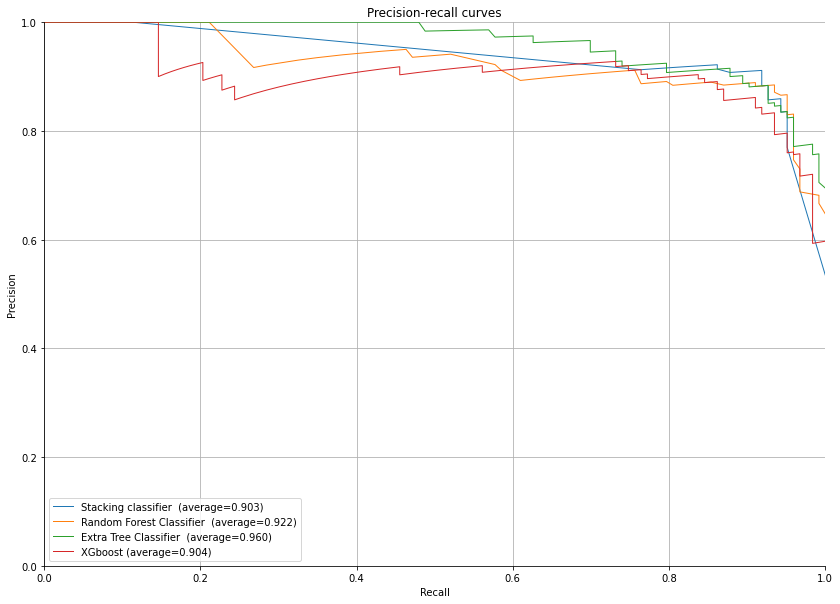

In [102]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,model.predict_proba(S_test),label='Stacking classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_500.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

**FEATURE IMPORTANCE**

<AxesSubplot:>

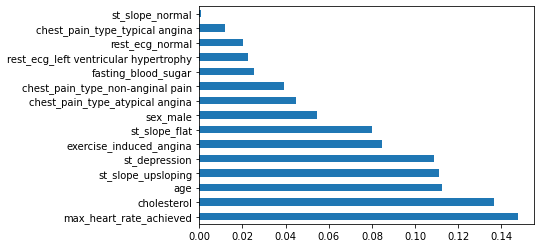

In [103]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## CONCLUSION


**The top 5 most contribution features are:**
1. Max heart Rate achieved
1. Cholestrol
1. st_depression
1. Age
1. exercise_induced_angina